# Advanced plotting


In [1]:
import vaex as vx
import numpy as np
%matplotlib inline

In [2]:
ds = vx.example()

## Single plot

Simplest example of a single plot.

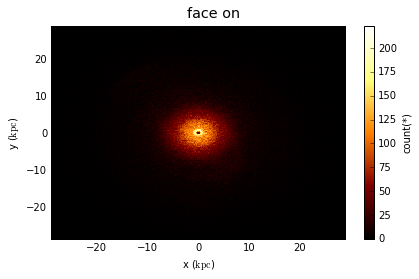

In [3]:
ds.plot("x", "y", title="face on");

## Multiple plots of the same type
Here we shows two plots, both showing counts

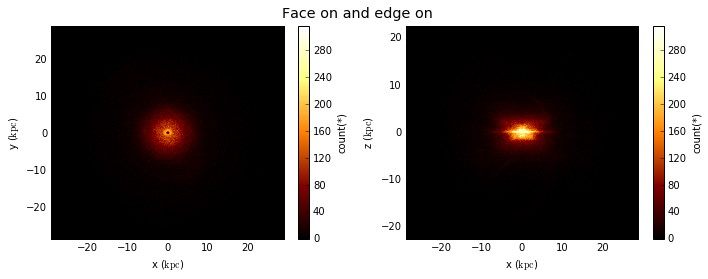

In [4]:
ds.plot([["x", "y"], ["x", "z"]], title="Face on and edge on", figsize=(10,4));

## Multiple plots, same axes, different statistic
If the what argument is a list, it will (by default) form the columns of subplots.

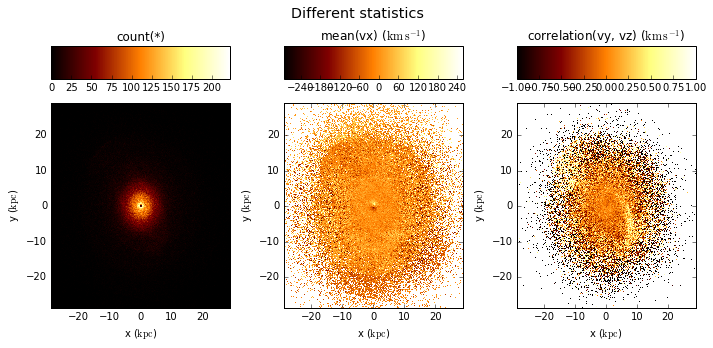

In [5]:
ds.plot("x", "y", what=["count(*)", "mean(vx)", "correlation(vy, vz)"], title="Different statistics", figsize=(10,5));

## Multiple plots, different axes and different statistic
If multiple subspaces are given as a first argument, as well as multiple what arguments, the subspaces will form the rows, and the 'whats' will form the columns.

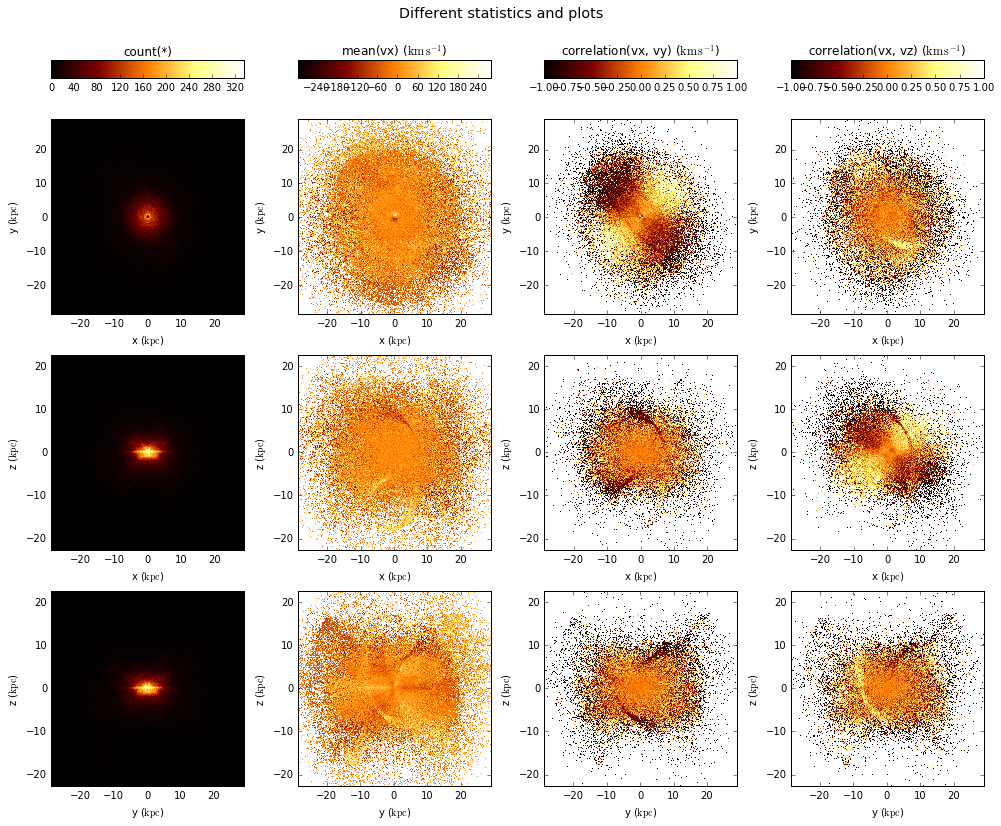

In [6]:
ds.plot([["x", "y"], ["x", "z"], ["y", "z"]],
        what=["count(*)", "mean(vx)", "correlation(vx, vy)", "correlation(vx, vz)"],
        title="Different statistics and plots", figsize=(14,12));

Specify what goes as row and column using the visual argument, here we swap the row and column ordering.

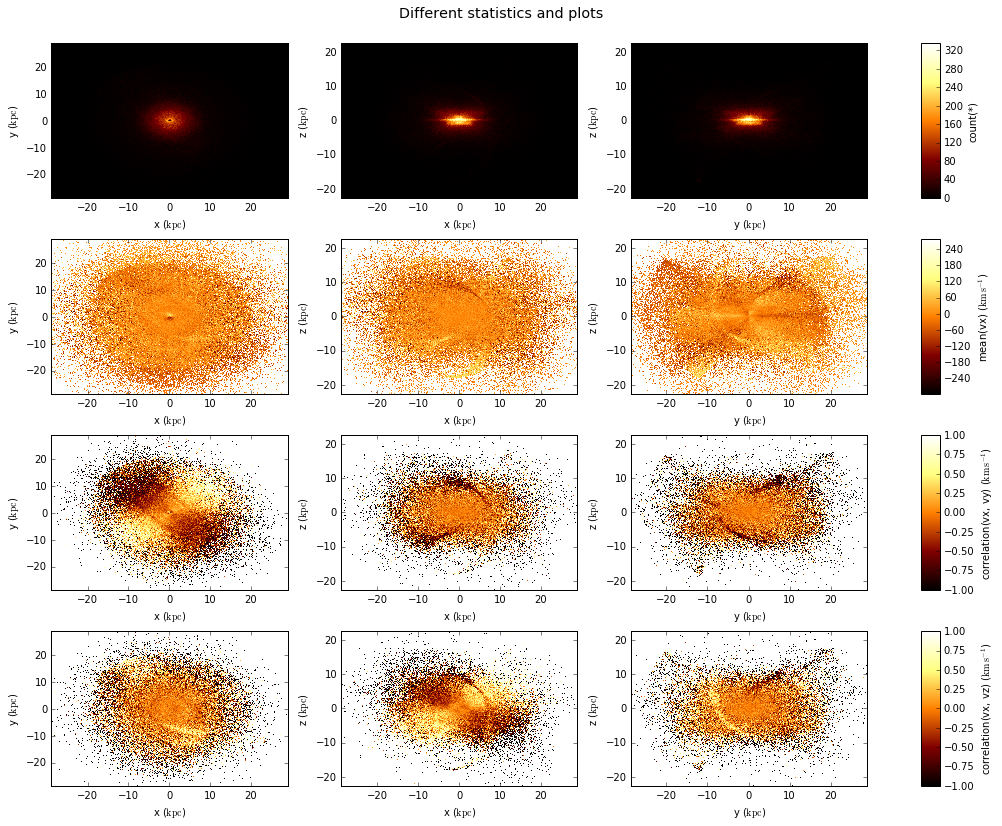

In [7]:
ds.plot([["x", "y"], ["x", "z"], ["y", "z"]],
        what=["count(*)", "mean(vx)", "correlation(vx, vy)", "correlation(vx, vz)"],
        visual=dict(row="what", column="subspace"),
        title="Different statistics and plots", figsize=(14,12));

## Slices in a 3rd dimension
If a 3rd axis (z) is given, you can 'slice' through the data, displaying the z slices as rows. Note that here the rows are wrapped, which can be changed using the `wrap_columns=4` argument.

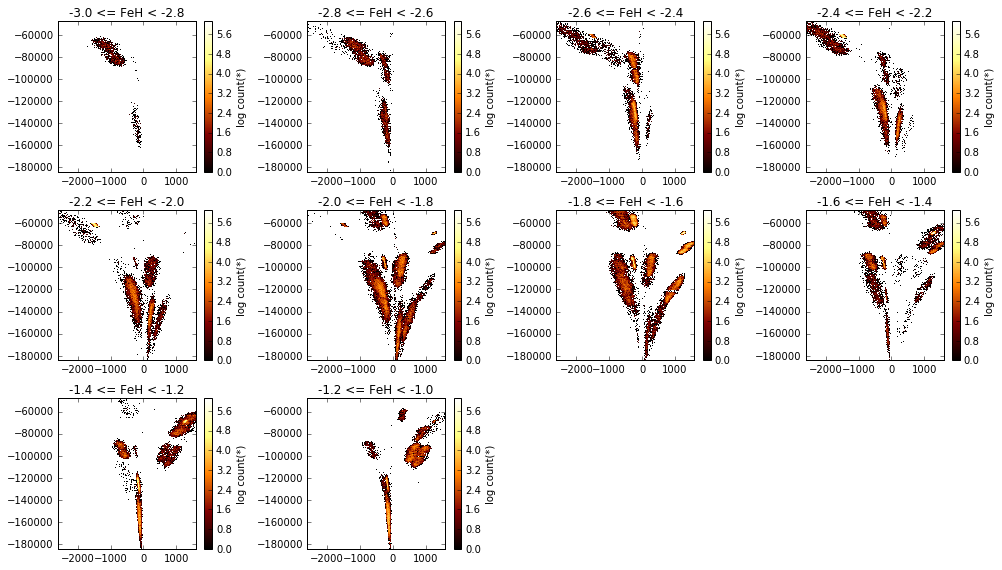

In [8]:
ds.plot("Lz", "E", z="FeH:-3,-1,10", show=True, visual=dict(row="z"), figsize=(14,8), f="log");

### Many plots with wrapping
Also if many plots are plotted, they are nicely wrapped. Here we plot them sorted my mutual information.

In [9]:
allpairs = ds.combinations(exclude=["random_index"])
mi, pairs = ds.mutual_information(allpairs, sort=True)

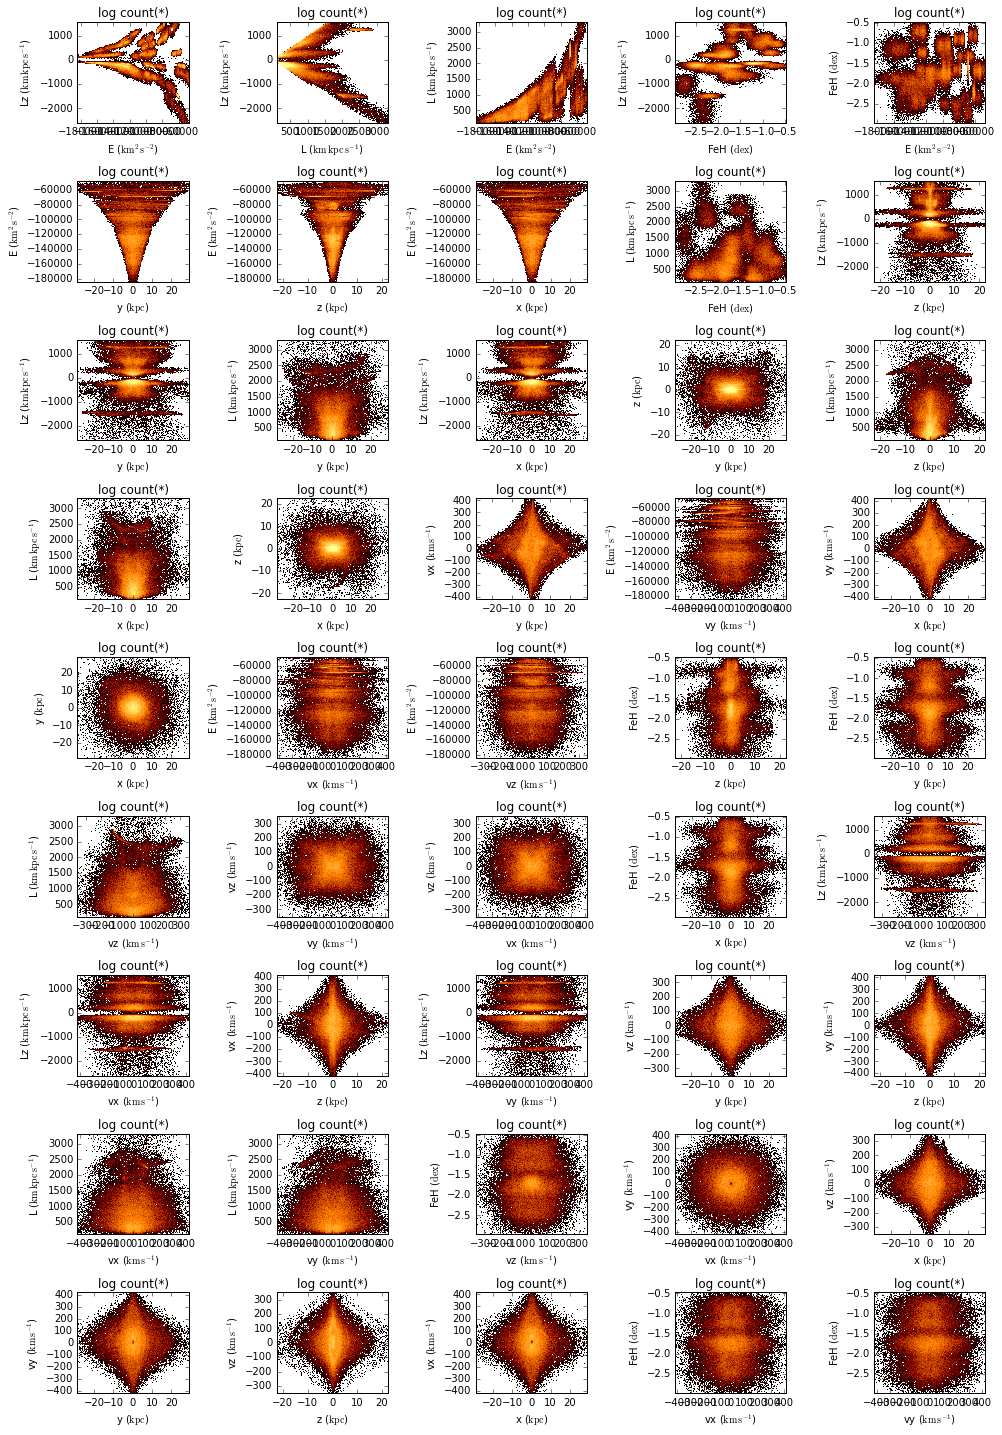

In [10]:
ds.plot(pairs, f="log", figsize=(14,20), colorbar=False, wrap_columns=5)

## Using selections

If a selection is used, then onlt the selection is plotted.

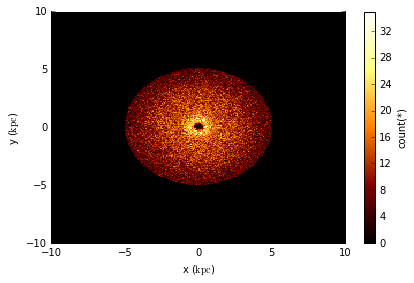

In [11]:
ds.plot("x", "y", selection="sqrt(x**2+y**2) < 5", limits=[-10, 10]);

If multiple selections are given (where False or None indicates no selection), every selection by default forms a 'layer', which are then blended together.

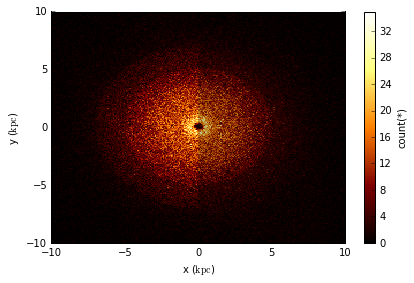

In [12]:
ds.plot("x", "y", selection=[False, "sqrt(x**2+y**2) < 5", "(sqrt(x**2+y**2) < 7) & (x < 0)"], limits=[-10, 10]);

However, by specifying that the selection should be mapped to a column, we can show a different selection in each row.

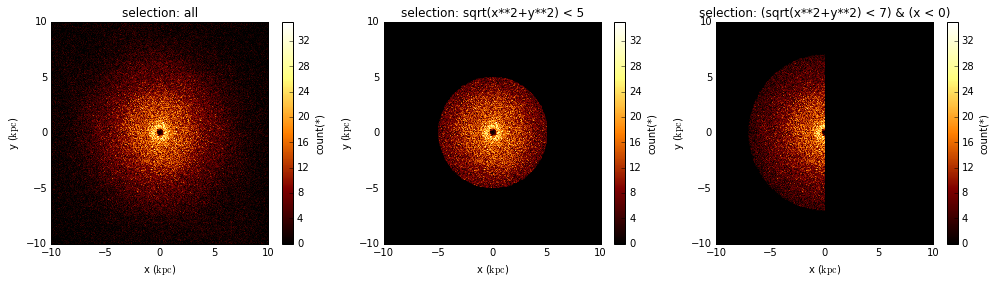

In [13]:
ds.plot("x", "y", selection=[False, "sqrt(x**2+y**2) < 5", "(sqrt(x**2+y**2) < 7) & (x < 0)"], limits=[-10, 10],
       visual=dict(column="selection"), figsize=(14,4));